In [7]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../src')
from models import random_xi, spiked_model
from solvers import online

from tqdm.notebook import tqdm
from joblib import Parallel, delayed

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rho = 0.05
p = 10000
omega = 1
beta = 0.27
tau = 0.5
T = 100 # t -> inf

def get_omega_Q(omega, progress=None):
    model = spiked_model(omega, rho=rho, p=p)
    Q = online(model, phi, tau, T, progress=progress)
    return Q[-1]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# OIST

omegas = np.linspace(0, 1, 20)

phi = lambda x: beta*np.sign(x)
omega_Qs = Parallel(n_jobs=8, verbose=50)(delayed(get_omega_Q)(o) for o in omegas)
   
omega_Qs = np.array(omega_Qs)
np.savetxt('../data/omega_oist', omega_Qs)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed: 18.0min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed: 18.0min
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed: 18.0min
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed: 18.0min
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed: 18.0min
[Parallel(n_jobs=8)]: Done   6 out of  20 | elapsed: 18.0min remaining: 42.1min
[Parallel(n_jobs=8)]: Done   7 out of  20 | elapsed: 18.1min remaining: 33.6min
[Parallel(n_jobs=8)]: Done   8 out of  20 | elapsed: 18.1min remaining: 27.2min
[Parallel(n_jobs=8)]: Done   9 out of  20 | elapsed: 38.4min remaining: 46.9min
[Parallel(n_jobs=8)]: Done  10 out of  20 | elapsed: 38.4min remaining: 38.4min
[Parallel(n_jobs=8)]: Done  11 out of  20 | elapsed: 38.4min remaining: 31.4min
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed: 38.4min remaining: 25.6min
[Parallel(n_jobs=8)]: Done  13 out of  20 | elapsed: 38.4min

In [11]:
# OJA

omegas = np.linspace(0, 1, 20)

phi = lambda x: np.zeros_like(x)
omega_Qs = Parallel(n_jobs=8, verbose=50)(delayed(get_omega_Q)(o) for o in omegas)
    
omega_Qs = np.array(omega_Qs)
np.savetxt('../data/omega_oja', omega_Qs)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed: 17.4min
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed: 17.4min
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed: 17.4min
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed: 17.4min
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed: 17.5min
[Parallel(n_jobs=8)]: Done   6 out of  20 | elapsed: 17.5min remaining: 40.8min
[Parallel(n_jobs=8)]: Done   7 out of  20 | elapsed: 17.5min remaining: 32.5min
[Parallel(n_jobs=8)]: Done   8 out of  20 | elapsed: 17.5min remaining: 26.2min
[Parallel(n_jobs=8)]: Done   9 out of  20 | elapsed: 35.4min remaining: 43.3min
[Parallel(n_jobs=8)]: Done  10 out of  20 | elapsed: 35.4min remaining: 35.4min
[Parallel(n_jobs=8)]: Done  11 out of  20 | elapsed: 35.5min remaining: 29.0min
[Parallel(n_jobs=8)]: Done  12 out of  20 | elapsed: 35.5min remaining: 23.7min
[Parallel(n_jobs=8)]: Done  13 out of  20 | elapsed: 35.5min

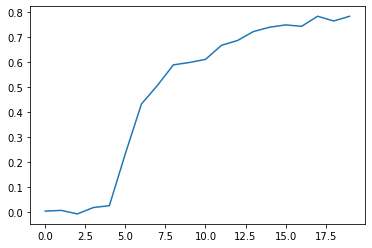

In [12]:
plt.plot(omega_Qs)